In [1]:
### Importing the required libraries
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Train-Test Split
from sklearn.model_selection import train_test_split

#For Standardization
from sklearn.preprocessing import StandardScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing Stats Model for model building
import statsmodels.api as sm

#Importing r2_score
from sklearn.metrics import r2_score


#Specifying all columns to be shown
pd.set_option('display.max_columns', None)

In [2]:
#Reading train dataset
movie_df = pd.read_csv('box_office_train.csv')
movie_df.head()

id                              belongs_to_collection    budget  \
0   0                                                NaN   3000000   
1   1                                                NaN         0   
2   2  [{'id': 416491, 'name': 'Major Korenev Trilogy...   5000000   
3   3                                                NaN         0   
4   4  [{'id': 112636, 'name': 'The Blues Brothers Co...  28000000   

                                              genres homepage    imdb_id  \
0                    [{'id': 37, 'name': 'Western'}]      NaN  tt0040724   
1                [{'id': 99, 'name': 'Documentary'}]      NaN  tt0099028   
2  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...      NaN  tt0325005   
3  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      NaN  tt0101595   
4  [{'id': 10402, 'name': 'Music'}, {'id': 28, 'n...      NaN  tt0118747   

  original_language       original_title  \
0                en            Red River   
1                en       American Dream   
2                ru           Антикиллер   
3                en        Close My Eyes   
4                en  Blues Brothers 2000   

                                            overview  popularity  \
0  Dunson is driving his cattle to Red River when...    6.090180   
1  Chronicles the six-month strike at Hormel in A...    0.075885   
2  Former criminal investigator, Major Korenev, n...    0.191539   
3  After some years of tension, Richard begins a ...    1.404434   
4  Elwood, the now lone "Blues Brother" finally r...   13.162168   

                        poster_path  \
0  /9TwFtppqU0zUvtNTIDxkV7zQebC.jpg   
1  /oi2vKZROaDoJpt1vvKXeQOTKlNK.jpg   
2  /pkdnzpmacniXKJnEmlD7q5KCFrw.jpg   
3   /r6llY1uyhQOXLh8lFuohoed315.jpg   
4  /87FRtfvpH6nGhGRIDymcNGn6duK.jpg   

                                production_companies  \
0  [{'name': 'United Artists', 'id': 60}, {'name'...   
1                                                NaN   
2                                                NaN   
3  [{'name': 'Film 4', 'id': 2335}, {'name': 'Fil...   
4         [{'name': 'Universal Pictures', 'id': 33}]   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      8/26/48    133.0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...      9/28/90     98.0   
2           [{'iso_3166_1': 'RU', 'name': 'Russia'}]       8/1/02    113.0   
3   [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]     11/22/91    109.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...       2/5/98    123.0   

                                    spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
3           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4  [{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...  Released   

                                             tagline                title  \
0  Big as the men who faced this challenge! Bold ...            Red River   
1  The award-winning film of American lives, Amer...       American Dream   
2                                                NaN           Antikiller   
3  There are some relationships so taboo they're ...        Close My Eyes   
4                                                NaN  Blues Brothers 2000   

                                            Keywords  \
0  [{'id': 1556, 'name': 'texas'}, {'id': 3851, '...   
1         [{'id': 187056, 'name': 'woman director'}]   
2                                                NaN   
3  [{'id': 255, 'name': 'male nudity'}, {'id': 29...   
4  [{'id': 378, 'name': 'prison'}, {'id': 2636, '...   

                                                cast  \
0  [{'cast_id': 10, 'character': 'Thomas Dunson',...   
1  [{'cast_id': 5, 'character': 'Himself', 'credi...   
2  [{'cast_id': 6, 'character': 'Cross (Krest

In [3]:
movie_df.status.value_counts()
#data is highly biased hence this column is not useful for prediction

Released    2396
Rumored        4
Name: status, dtype: int64

In [4]:
#removing unnecessary columns
movie_df = movie_df.drop(['id','imdb_id','overview','poster_path','tagline','original_title','title','Keywords','belongs_to_collection','homepage',
                          'status'],axis=1)

In [5]:
#checking percentage of null values
100*movie_df.isnull().mean().sort_values(ascending=False)

production_companies    5.166667
production_countries    1.791667
spoken_languages        0.583333
crew                    0.541667
cast                    0.416667
genres                  0.250000
runtime                 0.083333
budget                  0.000000
original_language       0.000000
popularity              0.000000
release_date            0.000000
revenue                 0.000000
dtype: float64

In [6]:
movie_df.shape

(2400, 12)

In [7]:
#analyzing runtime column
movie_df.runtime.describe()

count    2398.000000
mean      107.798999
std        22.158126
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [8]:
#replacing null values with min value 
movie_df.runtime = movie_df.runtime.replace(np.nan,0)
len(movie_df[movie_df.runtime == 0])

12

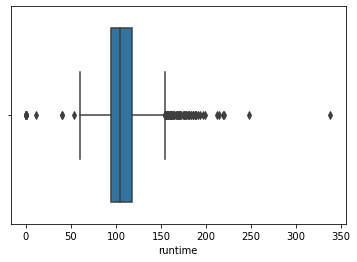

In [9]:
sns.boxplot(movie_df.runtime)
plt.show()

In [10]:
#as runtime cannot be 0 hence replacing with median since outliers are present
movie_df.runtime = movie_df.runtime.replace(0,movie_df.runtime.median())
len(movie_df[movie_df.runtime == 0])

0

In [11]:
#removing rows that have genre or spoken_languages as null
movie_df = movie_df[~movie_df.genres.isnull()]
movie_df = movie_df[~movie_df.spoken_languages.isnull()]

In [12]:
movie_df.shape

(2382, 12)

In [13]:
100 * (len(movie_df[movie_df.production_companies.isnull()]) + len(movie_df[movie_df.production_countries.isnull()]) + len(movie_df[movie_df.cast.isnull()]) + len(movie_df[movie_df.crew.isnull()])) / len(movie_df)
#7% data cannot be removed so will replace it with Other category

7.136859781696054

In [14]:
#custom function to extract names dicitonary to form a comma separated string
import ast
def convert_data(list1):
    string = ''
    for i in ast.literal_eval(list1):
        for key,values in i.items():
            if key == 'name':
                if string == '':
                    string = string + i[key]
                else:
                    string = string + ',' + i[key]
    return string

In [15]:
#applying custom function
for i in ['genres','spoken_languages']:
    movie_df[i] = movie_df[i].apply(lambda x: convert_data(x))
movie_df.head()

budget                     genres original_language  popularity  \
0   3000000                    Western                en    6.090180   
1         0                Documentary                en    0.075885   
2   5000000               Action,Crime                ru    0.191539   
3         0              Drama,Romance                en    1.404434   
4  28000000  Music,Action,Comedy,Crime                en   13.162168   

                                production_companies  \
0  [{'name': 'United Artists', 'id': 60}, {'name'...   
1                                                NaN   
2                                                NaN   
3  [{'name': 'Film 4', 'id': 2335}, {'name': 'Fil...   
4         [{'name': 'Universal Pictures', 'id': 33}]   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      8/26/48    133.0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...      9/28/90     98.0   
2           [{'iso_3166_1': 'RU', 'name': 'Russia'}]       8/1/02    113.0   
3   [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]     11/22/91    109.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...       2/5/98    123.0   

                   spoken_languages  \
0  English,Deutsch,Italiano,Español   
1                           English   
2                           Pусский   
3                           English   
4                   Pусский,English   

                                                cast  \
0  [{'cast_id': 10, 'character': 'Thomas Dunson',...   
1  [{'cast_id': 5, 'character': 'Himself', 'credi...   
2  [{'cast_id': 6, 'character': 'Cross (Krest)', ...   
3  [{'cast_id': 1, 'character': 'Sinclair', 'cred...   
4  [{'cast_id': 16, 'character': 'Elwood Blues', ...   

                                                crew   revenue  
0  [{'credit_id': '52fe4384c3a36847f805a485', 'de...   9012000  
1  [{'credit_id': '52fe45c2c3a36847f80d8e9d', 'de...    269823  
2  [{'credit_id': '52fe45e5c3a36847f80e08db', 'de...    340312  
3  [{'credit_id': '52fe4881c3a36847f816abb5', 'de...    135893  
4  [{'credit_id': '52fe445d9251416c750321a7', 'de...  14051384

In [16]:
#generating a list of genres
list_genres = []
for x in movie_df.genres:
    curr_list = x.split(',')
    for i in curr_list:
        if i not in list_genres:
            list_genres.append(i)
len(list_genres)

20

In [17]:
#replacing missing values with Other
cols = ['production_companies','production_countries','cast','crew']
for i in cols:
    movie_df[i].replace(np.NaN,'[{\'name\': \'Other\'}]',inplace=True)         

In [18]:
movie_df.head()

budget                     genres original_language  popularity  \
0   3000000                    Western                en    6.090180   
1         0                Documentary                en    0.075885   
2   5000000               Action,Crime                ru    0.191539   
3         0              Drama,Romance                en    1.404434   
4  28000000  Music,Action,Comedy,Crime                en   13.162168   

                                production_companies  \
0  [{'name': 'United Artists', 'id': 60}, {'name'...   
1                                [{'name': 'Other'}]   
2                                [{'name': 'Other'}]   
3  [{'name': 'Film 4', 'id': 2335}, {'name': 'Fil...   
4         [{'name': 'Universal Pictures', 'id': 33}]   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      8/26/48    133.0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...      9/28/90     98.0   
2           [{'iso_3166_1': 'RU', 'name': 'Russia'}]       8/1/02    113.0   
3   [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]     11/22/91    109.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...       2/5/98    123.0   

                   spoken_languages  \
0  English,Deutsch,Italiano,Español   
1                           English   
2                           Pусский   
3                           English   
4                   Pусский,English   

                                                cast  \
0  [{'cast_id': 10, 'character': 'Thomas Dunson',...   
1  [{'cast_id': 5, 'character': 'Himself', 'credi...   
2  [{'cast_id': 6, 'character': 'Cross (Krest)', ...   
3  [{'cast_id': 1, 'character': 'Sinclair', 'cred...   
4  [{'cast_id': 16, 'character': 'Elwood Blues', ...   

                                                crew   revenue  
0  [{'credit_id': '52fe4384c3a36847f805a485', 'de...   9012000  
1  [{'credit_id': '52fe45c2c3a36847f80d8e9d', 'de...    269823  
2  [{'credit_id': '52fe45e5c3a36847f80e08db', 'de...    340312  
3  [{'credit_id': '52fe4881c3a36847f816abb5', 'de...    135893  
4  [{'credit_id': '52fe445d9251416c750321a7', 'de...  14051384

In [19]:
#applying custom function to format data
for i in cols:
    movie_df[i] = movie_df[i].apply(lambda x: convert_data(x))
movie_df.head()

budget                     genres original_language  popularity  \
0   3000000                    Western                en    6.090180   
1         0                Documentary                en    0.075885   
2   5000000               Action,Crime                ru    0.191539   
3         0              Drama,Romance                en    1.404434   
4  28000000  Music,Action,Comedy,Crime                en   13.162168   

                                production_companies  \
0  United Artists,Monterey Productions,Charles K....   
1                                              Other   
2                                              Other   
3          Film 4,Film Four International,Beambright   
4                                 Universal Pictures   

                      production_countries release_date  runtime  \
0                 United States of America      8/26/48    133.0   
1  United Kingdom,United States of America      9/28/90     98.0   
2                                   Russia       8/1/02    113.0   
3                           United Kingdom     11/22/91    109.0   
4                 United States of America       2/5/98    123.0   

                   spoken_languages  \
0  English,Deutsch,Italiano,Español   
1                           English   
2                           Pусский   
3                           English   
4                   Pусский,English   

                                                cast  \
0  John Wayne,Montgomery Clift,Joanne Dru,Walter ...   
1    Jesse Jackson,Juan Munoz,Ray Rogers,Mike Kinney   
2  Sergey Shakurov,Aleksandr Baluev,Yuriy Kutsenk...   
3  Alan Rickman,Clive Owen,Saskia Reeves,Karl Joh...   
4  Dan Aykroyd,John Goodman,Joe Morton,J. Evan Bo...   

                                                crew   revenue  
0  Dimitri Tiomkin,Russell Harlan,Howard Hawks,Ho...   9012000  
1  Barbara Kopple,Cathy Caplan,Tom Haneke,Lawrenc...    269823  
2  Yegor Konchalovsky,Fuad Ibragimbekov,Danil Kor...    340312  
3  Witold Stok,Joyce Gallie,Luciana Arrighi,Micha...    135893  
4  John Landis,John Landis,Leslie Belzberg,John L...  14051384

In [20]:
#generating a list of production companies
list_prod_comp = []
for x in movie_df.production_companies:
    curr_list = x.split(',')
    for i in curr_list:
        if i not in list_prod_comp:
            list_prod_comp.append(i)
len(list_prod_comp)

3195

In [21]:
#custom function to create dictionary to check frequency of values
dict1 = {}
def cal_per(x):
    for i in x.split(','):
        if i not in dict1.keys():
            dict1[i] = 1
        else:
            dict1[i] +=1 

In [22]:
#checking frequency of prod comp
movie_df.production_companies.apply(lambda x: cal_per(x))
keys = list(dict1.keys())
values = list(dict1.values())
sorted_value_index = np.argsort(values)
sorted_dict_prodcomp = {keys[i]: values[i] for i in sorted_value_index}
 
print(sorted_dict_prodcomp)

{'Dolly Hall Productions': 1, 'Rita Productions': 1, 'Blue Spirit Animation': 1, "I'm So Sorry Productions": 1, 'The Independent Film Channel Productions': 1, 'Delphi IV Productions': 1, 'Tall Trees Productions': 1, 'KDDI Corporation': 1, 'Gébéka Films': 1, 'Mitsubishi Shoji': 1, 'Pricel': 1, 'Lightmotive': 1, 'A Loopy Production LLC': 1, '2 Loop Films': 1, 'Ymagis': 1, 'United Seven Creations': 1, 'Simcom Limited': 1, 'Gkids': 1, 'Allarcom Limited': 1, 'Wildside Media': 1, 'Warner Bros. Feature Animation': 1, 'Westerly Films': 1, 'Revolver Amsterdam': 1, 'KirchMedia': 1, 'Wildgaze Films': 1, 'Alan Greenspan Productions': 1, 'ELC Productions Ltd.': 1, 'Talent House': 1, 'Birnbaum / Barber Productions': 1, 'Pathe Productions': 1, 'Continental Film Group Ltd.': 1, 'Montauk Productions': 1, 'Göta Film': 1, 'Evergreen Media Group': 1, 'cechi gori group': 1, 'EMJAG Productions': 1, 'Team Downey': 1, 'Red Turtle': 1, 'Amazon Studios': 1, 'British Columbia Television': 1, 'TBA Film': 1, 'Offi

In [23]:
100*160/len(movie_df)

#As highest frequency for a procution company is 6% it doesnt seem to be a viable option to add categories

6.717044500419815

In [24]:
#generating a list of production countries
list_prod_count = []
for x in movie_df.production_countries:
    curr_list = x.split(',')
    for i in curr_list:
        if i not in list_prod_count:
            list_prod_count.append(i)
len(list_prod_count)

73

In [25]:
#checking frequency of prod country
dict1 = {}
movie_df.production_countries.apply(lambda x: cal_per(x))
keys = list(dict1.keys())
values = list(dict1.values())
sorted_value_index = np.argsort(values)
sorted_dict_prodcount = {keys[i]: values[i] for i in sorted_value_index}
 
print(sorted_dict_prodcount)

{'Namibia': 1, 'Slovenia': 1, 'Qatar': 1, 'Cyprus': 1, 'Burkina Faso': 1, 'Ghana': 1, 'Ethiopia': 1, 'Bosnia and Herzegovina': 1, 'Mongolia': 1, 'Puerto Rico': 1, 'Indonesia': 1, 'Mauritania': 1, 'Uruguay': 1, 'Paraguay': 1, 'Algeria': 1, 'Peru': 1, 'Serbia': 1, 'Portugal': 1, 'Costa Rica': 1, 'Saudi Arabia': 1, 'Jordan': 1, 'Singapore': 2, 'Pakistan': 2, 'Tunisia': 2, 'Ukraine': 2, 'Iceland': 2, 'Cambodia': 2, 'Malta': 2, 'Bulgaria': 3, 'Morocco': 3, 'Taiwan': 3, 'Philippines': 3, 'Poland': 3, 'Bahamas': 3, 'Iran': 3, 'Greece': 4, 'Israel': 4, 'Finland': 5, 'Austria': 5, 'Hungary': 5, 'United Arab Emirates': 5, 'Turkey': 5, 'Argentina': 5, 'Chile': 5, 'Norway': 6, 'Switzerland': 7, 'Romania': 8, 'Luxembourg': 8, 'Czech Republic': 10, 'South Africa': 10, 'Denmark': 10, 'Brazil': 10, 'New Zealand': 11, 'Netherlands': 11, 'Sweden': 17, 'South Korea': 17, 'Mexico': 17, 'Belgium': 18, 'Ireland': 18, 'Hong Kong': 30, 'China': 32, 'Other': 36, 'Spain': 43, 'Russia': 47, 'Italy': 52, 'Japan':

In [26]:
1819*100/len(movie_df)

#76% is a good weightage we can create categories with higher percentage

76.36439966414777

In [27]:
#generating a list of cast
list_cast = []
for x in movie_df.cast:
    curr_list = x.split(',')
    for i in curr_list:
        if i not in list_cast:
            list_cast.append(i)
len(list_cast)

32488

In [28]:
#checking frequency of cast
dict1 = {}
movie_df.cast.apply(lambda x: cal_per(x))
keys = list(dict1.keys())
values = list(dict1.values())
sorted_value_index = np.argsort(values)
sorted_dict_cast = {keys[i]: values[i] for i in sorted_value_index}
 
print(sorted_dict_cast)

{'Jonah Lotan': 1, 'David H. Hickey': 1, 'Jaime King': 1, 'Randy Bass': 1, 'Jenilee Harrison': 1, 'Mary Kathleen Gordon': 1, 'Megan Crawford': 1, 'Adam Gobble': 1, 'Beth Toussaint': 1, 'Brittany Oaks': 1, 'Terry Press': 1, 'Jack Scalia': 1, 'Misty Upham': 1, 'Nat Bodian': 1, 'Al Baker Jr.': 1, 'Beverly Arlynne': 1, 'Joan Arline': 1, 'Bud Abbott': 1, 'Antonio Pica': 1, 'David Warbeck': 1, 'Enzo G. Castellari': 1, 'Dick Butkus': 1, 'Emma Cohen': 1, 'Duilio Cruciani': 1, 'Helmut Brasch': 1, 'Romano Puppo': 1, 'Greg Ingram': 1, 'Helen Kirk': 1, 'John McLeod': 1, 'Tommy Nix': 1, 'Phil Fondacaro': 1, 'Troy Fromin': 1, 'Irene Korman': 1, 'A. Michael Baldwin': 1, 'Mark Anthony Major': 1, 'Ruth C. Engel': 1, 'Kenneth Tigar': 1, 'Samantha Phillips': 1, 'Paula Irvine': 1, 'Reggie Bannister': 1, 'Dino Abbrescia': 1, 'Rachele Amenta': 1, 'Leo Anch√≥riz': 1, 'Anna Bonaiuto': 1, 'Diego Abatantuono': 1, 'Wolfgang Bodison': 1, 'Jason McDonald': 1, 'Evelyn Hurley': 1, 'Christina Frankenfield': 1, 'Cara 

In [29]:
36*100/len(movie_df)

#Not a good percentage for creating categories

1.5113350125944585

In [30]:
#generating a list of crew
list_crew = []
for x in movie_df.crew:
    curr_list = x.split(',')
    for i in curr_list:
        if i not in list_crew:
            list_crew.append(i)
len(list_crew)

33163

In [31]:
#checking frequency of crew
dict1 = {}
movie_df.crew.apply(lambda x: cal_per(x))
keys = list(dict1.keys())
values = list(dict1.values())
sorted_value_index = np.argsort(values)
sorted_dict_crew = {keys[i]: values[i] for i in sorted_value_index}
 
print(sorted_dict_crew)

{'Charley Armstrong': 1, 'Brian McClean': 1, 'Ralph Rea': 1, 'Billy Patsos': 1, 'Thomas Dolan': 1, 'Ed Durant√©': 1, 'Eric J. Paul': 1, 'Debbe DuPerrieu': 1, 'Bret Johnson': 1, 'Patricia Sprott': 1, 'Alan J. Lawson': 1, 'Peter DeCurtis': 1, 'Tony Burrough': 1, 'Peter Bundrick': 1, 'Carmen S. Riviera': 1, 'Sunday Englis': 1, 'Nathan J. Busch II': 1, 'Shawnique Hill': 1, 'Phillip Schneider': 1, 'Justin Ball': 1, 'Peter Baran': 1, 'Lauren Buckley': 1, "Jeanne O'Brien-Ebiri": 1, 'Mariusz Glabinski': 1, 'John Langley': 1, 'Roderick Alleyne': 1, 'John Hill': 1, 'Dominic Smithers': 1, 'Jiri Zucek': 1, 'Barbora Jurkovicova': 1, 'Peter Kalin': 1, 'Jez Oakley': 1, 'Petr Vladyka': 1, 'Ondrej Slama': 1, 'Jan Rehanzl': 1, 'Filip Majer': 1, 'Stuart Hopps': 1, 'Jan Skala': 1, 'Nicky Jones': 1, 'Tomas Hais': 1, 'Katherine Burchill': 1, 'Oliver Ward': 1, 'Jim Alloway': 1, 'Tom√°s Lehovec': 1, 'Corina Burrough': 1, 'Dan Sweetman': 1, 'Mark Kebby': 1, 'Ivana Chlostova': 1, 'Andy Arnautov': 1, 'Egon Endr√

In [32]:
40*100/len(movie_df)

#Not a good percentage for creating categories

1.6792611251049538

In [33]:
#generating a list of spoken languages
list_spokenlang = []
for x in movie_df.spoken_languages:
    curr_list = x.split(',')
    for i in curr_list:
        if i not in list_spokenlang:
            list_spokenlang.append(i)
len(list_spokenlang)

54

In [34]:
#checking frequency of spoken languages
dict1 = {}
movie_df.spoken_languages.apply(lambda x: cal_per(x))
keys = list(dict1.keys())
values = list(dict1.values())
sorted_value_index = np.argsort(values)
sorted_dict_sl = {keys[i]: values[i] for i in sorted_value_index}
 
print(sorted_dict_sl)

{'Wolof': 1, 'қазақ': 1, 'Eesti': 1, 'Català': 1, 'Slovenčina': 1, 'বাংলা': 2, 'isiZulu': 2, 'Afrikaans': 2, 'Bahasa indonesia': 2, 'Hrvatski': 2, 'български език': 2, 'Somali': 2, 'Esperanto': 2, 'shqip': 2, 'ਪੰਜਾਬੀ': 3, 'Gaeilge': 3, 'Íslenska': 3, 'Srpski': 4, 'No Language': 5, 'Український': 5, 'اردو': 5, 'Română': 6, 'suomi': 6, 'Norsk': 6, 'తెలుగు': 6, 'Kiswahili': 7, 'Tiếng Việt': 8, 'فارسی': 8, 'Nederlands': 8, 'ελληνικά': 10, 'Dansk': 11, 'Türkçe': 11, 'Český': 13, 'עִבְרִית': 13, 'svenska': 15, 'ภาษาไทย': 17, 'Latin': 18, 'Polski': 20, 'தமிழ்': 20, 'Magyar': 23, '广州话 / 廣州話': 27, 'العربية': 29, '한국어/조선말': 30, '': 31, 'Português': 35, 'हिन्दी': 40, '普通话': 54, '日本語': 73, 'Italiano': 99, 'Pусский': 120, 'Deutsch': 134, 'Español': 193, 'Français': 244, 'English': 2089}


In [35]:
2089*100/len(movie_df)
#87% is good representation hence we can use this for making categories

87.69941225860622

In [36]:
#removing production_companies, cast and crew
movie_df.drop(['production_companies','cast','crew'],axis=1,inplace=True)

In [37]:
#adding columns for genres
for i in list_genres:
    movie_df[i] = movie_df.genres.apply(lambda x: 1 if i in x.split(',') else 0)
movie_df.head()

budget                     genres original_language  popularity  \
0   3000000                    Western                en    6.090180   
1         0                Documentary                en    0.075885   
2   5000000               Action,Crime                ru    0.191539   
3         0              Drama,Romance                en    1.404434   
4  28000000  Music,Action,Comedy,Crime                en   13.162168   

                      production_countries release_date  runtime  \
0                 United States of America      8/26/48    133.0   
1  United Kingdom,United States of America      9/28/90     98.0   
2                                   Russia       8/1/02    113.0   
3                           United Kingdom     11/22/91    109.0   
4                 United States of America       2/5/98    123.0   

                   spoken_languages   revenue  Western  Documentary  Action  \
0  English,Deutsch,Italiano,Español   9012000        1            0       0   
1                           English    269823        0            1       0   
2                           Pусский    340312        0            0       1   
3                           English    135893        0            0       0   
4                   Pусский,English  14051384        0            0       1   

   Crime  Drama  Romance  Music  Comedy  Adventure  Thriller  Mystery  \
0      0      0        0      0       0          0         0        0   
1      0      0        0      0       0          0         0        0   
2      1      0        0      0       0          0         0        0   
3      0      1        1      0       0          0         0        0   
4      1      0        0      1       1          0         0        0   

   Science Fiction  Fantasy  Animation  Family  War  Horror  History  Foreign  \
0                0        0          0       0    0       0        0        0   
1                0        0          0       0    0       0        0        0   
2                0        0          0       0    0       0        0        0   
3                0        0          0       0    0       0        0        0   
4                0        0          0       0    0       0        0        0   

   TV Movie  
0         0  
1         0  
2         0  
3         0  
4         0

In [38]:
#checking count of records per genre
for i in list_genres:
    print('Sum of: ',i, movie_df[i].sum())

Sum of:  Western 34
Sum of:  Documentary 68
Sum of:  Action 596
Sum of:  Crime 370
Sum of:  Drama 1215
Sum of:  Romance 440
Sum of:  Music 79
Sum of:  Comedy 813
Sum of:  Adventure 346
Sum of:  Thriller 636
Sum of:  Mystery 184
Sum of:  Science Fiction 240
Sum of:  Fantasy 186
Sum of:  Animation 115
Sum of:  Family 209
Sum of:  War 82
Sum of:  Horror 234
Sum of:  History 106
Sum of:  Foreign 20
Sum of:  TV Movie 1


In [39]:
#Dropping TV Movie as only 1 record is present for that
movie_df.drop('TV Movie',axis=1,inplace=True)

In [40]:
#adding columns of production_countries
valid_cat_pc = []
for k,v in sorted_dict_prodcount.items():
    if v >= 100:
        valid_cat_pc.append(k)
for i in valid_cat_pc:
    movie_df[i] = movie_df.production_countries.apply(lambda x: 1 if i in x.split(',') else 0)
movie_df.head()

budget                     genres original_language  popularity  \
0   3000000                    Western                en    6.090180   
1         0                Documentary                en    0.075885   
2   5000000               Action,Crime                ru    0.191539   
3         0              Drama,Romance                en    1.404434   
4  28000000  Music,Action,Comedy,Crime                en   13.162168   

                      production_countries release_date  runtime  \
0                 United States of America      8/26/48    133.0   
1  United Kingdom,United States of America      9/28/90     98.0   
2                                   Russia       8/1/02    113.0   
3                           United Kingdom     11/22/91    109.0   
4                 United States of America       2/5/98    123.0   

                   spoken_languages   revenue  Western  Documentary  Action  \
0  English,Deutsch,Italiano,Español   9012000        1            0       0   
1                           English    269823        0            1       0   
2                           Pусский    340312        0            0       1   
3                           English    135893        0            0       0   
4                   Pусский,English  14051384        0            0       1   

   Crime  Drama  Romance  Music  Comedy  Adventure  Thriller  Mystery  \
0      0      0        0      0       0          0         0        0   
1      0      0        0      0       0          0         0        0   
2      1      0        0      0       0          0         0        0   
3      0      1        1      0       0          0         0        0   
4      1      0        0      1       1          0         0        0   

   Science Fiction  Fantasy  Animation  Family  War  Horror  History  Foreign  \
0                0        0          0       0    0       0        0        0   
1                0        0          0       0    0       0        0        0   
2                0        0          0       0    0       0        0        0   
3                0        0          0       0    0       0        0        0   
4                0        0          0       0    0       0        0        0   

   Canada  Germany  France  United Kingdom  United States of America  
0       0        0       0               0                         1  
1       0        0       0               1                         1  
2       0        0       0               0                         0  
3       0        0       0               1                         0  
4       0        0       0               0                         1

In [41]:
#adding columns of spoken_languages
valid_cat_sl = []
for k,v in sorted_dict_sl.items():
    if v >= 99:
        valid_cat_sl.append(k)
for i in valid_cat_sl:
    movie_df[i] = movie_df.spoken_languages.apply(lambda x: 1 if i in x.split(',') else 0)
movie_df.head()

budget                     genres original_language  popularity  \
0   3000000                    Western                en    6.090180   
1         0                Documentary                en    0.075885   
2   5000000               Action,Crime                ru    0.191539   
3         0              Drama,Romance                en    1.404434   
4  28000000  Music,Action,Comedy,Crime                en   13.162168   

                      production_countries release_date  runtime  \
0                 United States of America      8/26/48    133.0   
1  United Kingdom,United States of America      9/28/90     98.0   
2                                   Russia       8/1/02    113.0   
3                           United Kingdom     11/22/91    109.0   
4                 United States of America       2/5/98    123.0   

                   spoken_languages   revenue  Western  Documentary  Action  \
0  English,Deutsch,Italiano,Español   9012000        1            0       0   
1                           English    269823        0            1       0   
2                           Pусский    340312        0            0       1   
3                           English    135893        0            0       0   
4                   Pусский,English  14051384        0            0       1   

   Crime  Drama  Romance  Music  Comedy  Adventure  Thriller  Mystery  \
0      0      0        0      0       0          0         0        0   
1      0      0        0      0       0          0         0        0   
2      1      0        0      0       0          0         0        0   
3      0      1        1      0       0          0         0        0   
4      1      0        0      1       1          0         0        0   

   Science Fiction  Fantasy  Animation  Family  War  Horror  History  Foreign  \
0                0        0          0       0    0       0        0        0   
1                0        0          0       0    0       0        0        0   
2                0        0          0       0    0       0        0        0   
3                0        0          0       0    0       0        0        0   
4                0        0          0       0    0       0        0        0   

   Canada  Germany  France  United Kingdom  United States of America  \
0       0        0       0               0                         1   
1       0        0       0               1                         1   
2       0        0       0               0                         0   
3       0        0       0               1                         0   
4       0        0       0               0                         1   

   Italiano  Pусский  Deutsch  Español  Français  English  
0         1        0        1        1         0        1  
1         0        0        0        0         0        1  
2         0        1        0        0         0        0  
3         0        0        0        0         0        1  
4         0        1        0        0         0        1

In [42]:
#Dropping original columns
movie_df.drop(['genres','production_countries','spoken_languages'],axis=1,inplace=True)
movie_df.head()

budget original_language  popularity release_date  runtime   revenue  \
0   3000000                en    6.090180      8/26/48    133.0   9012000   
1         0                en    0.075885      9/28/90     98.0    269823   
2   5000000                ru    0.191539       8/1/02    113.0    340312   
3         0                en    1.404434     11/22/91    109.0    135893   
4  28000000                en   13.162168       2/5/98    123.0  14051384   

   Western  Documentary  Action  Crime  Drama  Romance  Music  Comedy  \
0        1            0       0      0      0        0      0       0   
1        0            1       0      0      0        0      0       0   
2        0            0       1      1      0        0      0       0   
3        0            0       0      0      1        1      0       0   
4        0            0       1      1      0        0      1       1   

   Adventure  Thriller  Mystery  Science Fiction  Fantasy  Animation  Family  \
0          0         0        0                0        0          0       0   
1          0         0        0                0        0          0       0   
2          0         0        0                0        0          0       0   
3          0         0        0                0        0          0       0   
4          0         0        0                0        0          0       0   

   War  Horror  History  Foreign  Canada  Germany  France  United Kingdom  \
0    0       0        0        0       0        0       0               0   
1    0       0        0        0       0        0       0               1   
2    0       0        0        0       0        0       0               0   
3    0       0        0        0       0        0       0               1   
4    0       0        0        0       0        0       0               0   

   United States of America  Italiano  Pусский  Deutsch  Español  Français  \
0                         1         1        0        1        1         0   
1                         1         0        0        0        0         0   
2                         0         0        1        0        0         0   
3                         0         0        0        0        0         0   
4                         1         0        1        0        0         0   

   English  
0        1  
1        1  
2        0  
3        1  
4        1

In [43]:
#analyzing budget column
movie_df.budget.describe()

count    2.382000e+03
mean     2.294316e+07
std      3.744737e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      3.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [44]:
len(movie_df[movie_df.budget == 0])

623

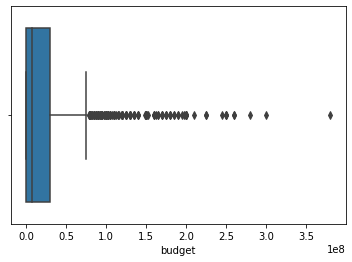

In [45]:
sns.boxplot(movie_df['budget'])
plt.show()

In [46]:
#as budget cannot be 0 hence replacing with median as it has outliers
movie_df.budget = movie_df.budget.replace(0,movie_df.budget.median())
len(movie_df[movie_df.budget == 0])

0

Identifying presence of outliers

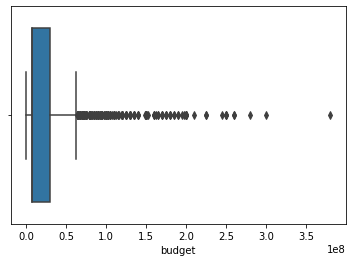

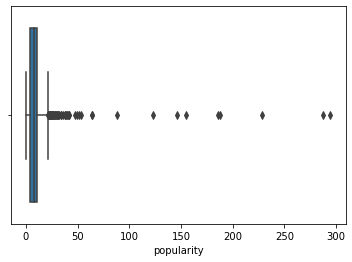

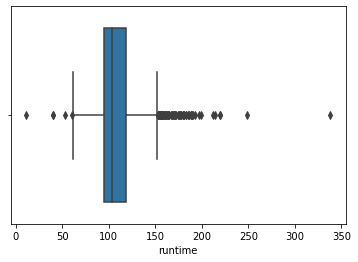

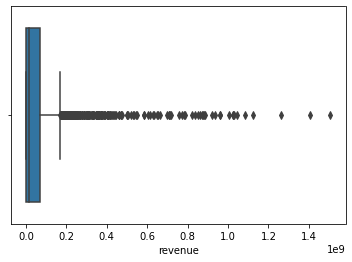

In [47]:
#analyzing numeric columns
cols_to_update = ["budget","popularity","runtime","revenue"]
for i in cols_to_update:
    sns.boxplot(movie_df[i])
    plt.show()

#not removing outliers as of now

Feature Engineering

In [48]:
#extracting date and month from release date
movie_df['release_month'] = pd.to_datetime(movie_df['release_date']).dt.month
movie_df['release_yr'] = pd.to_datetime(movie_df['release_date']).dt.year
movie_df.head()

budget original_language  popularity release_date  runtime   revenue  \
0   3000000                en    6.090180      8/26/48    133.0   9012000   
1   8000000                en    0.075885      9/28/90     98.0    269823   
2   5000000                ru    0.191539       8/1/02    113.0    340312   
3   8000000                en    1.404434     11/22/91    109.0    135893   
4  28000000                en   13.162168       2/5/98    123.0  14051384   

   Western  Documentary  Action  Crime  Drama  Romance  Music  Comedy  \
0        1            0       0      0      0        0      0       0   
1        0            1       0      0      0        0      0       0   
2        0            0       1      1      0        0      0       0   
3        0            0       0      0      1        1      0       0   
4        0            0       1      1      0        0      1       1   

   Adventure  Thriller  Mystery  Science Fiction  Fantasy  Animation  Family  \
0          0         0        0                0        0          0       0   
1          0         0        0                0        0          0       0   
2          0         0        0                0        0          0       0   
3          0         0        0                0        0          0       0   
4          0         0        0                0        0          0       0   

   War  Horror  History  Foreign  Canada  Germany  France  United Kingdom  \
0    0       0        0        0       0        0       0               0   
1    0       0        0        0       0        0       0               1   
2    0       0        0        0       0        0       0               0   
3    0       0        0        0       0        0       0               1   
4    0       0        0        0       0        0       0               0   

   United States of America  Italiano  Pусский  Deutsch  Español  Français  \
0                         1         1        0        1        1         0   
1                         1         0        0        0        0         0   
2                         0         0        1        0        0         0   
3                         0         0        0        0        0         0   
4                         1         0        1        0        0         0   

   English  release_month  release_yr  
0        1              8        2048  
1        1              9        1990  
2        0              8        2002  
3        1             11        1991  
4        1              2        1998

In [49]:
#Observed invalid values in the column hence analyzing
len(movie_df[movie_df.release_yr>2022])

137

In [50]:
#131 movies have incorrect release date, assigning 2023 to all of them to avoid outliers and still have a separate value for them
movie_df.release_yr = movie_df.release_yr.apply(lambda x: 2023 if x>2022 else x)
len(movie_df[movie_df.release_yr>2023])


0

In [51]:
movie_df.release_month.value_counts()

9     289
10    241
8     210
12    206
4     195
6     191
3     182
2     181
5     178
1     175
11    170
7     164
Name: release_month, dtype: int64

In [52]:
#converting month column to have meaningful values
movie_df['release_month'] = movie_df['release_month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',
                                       11:'nov',12:'dec'})
movie_df.head()

budget original_language  popularity release_date  runtime   revenue  \
0   3000000                en    6.090180      8/26/48    133.0   9012000   
1   8000000                en    0.075885      9/28/90     98.0    269823   
2   5000000                ru    0.191539       8/1/02    113.0    340312   
3   8000000                en    1.404434     11/22/91    109.0    135893   
4  28000000                en   13.162168       2/5/98    123.0  14051384   

   Western  Documentary  Action  Crime  Drama  Romance  Music  Comedy  \
0        1            0       0      0      0        0      0       0   
1        0            1       0      0      0        0      0       0   
2        0            0       1      1      0        0      0       0   
3        0            0       0      0      1        1      0       0   
4        0            0       1      1      0        0      1       1   

   Adventure  Thriller  Mystery  Science Fiction  Fantasy  Animation  Family  \
0          0         0        0                0        0          0       0   
1          0         0        0                0        0          0       0   
2          0         0        0                0        0          0       0   
3          0         0        0                0        0          0       0   
4          0         0        0                0        0          0       0   

   War  Horror  History  Foreign  Canada  Germany  France  United Kingdom  \
0    0       0        0        0       0        0       0               0   
1    0       0        0        0       0        0       0               1   
2    0       0        0        0       0        0       0               0   
3    0       0        0        0       0        0       0               1   
4    0       0        0        0       0        0       0               0   

   United States of America  Italiano  Pусский  Deutsch  Español  Français  \
0                         1         1        0        1        1         0   
1                         1         0        0        0        0         0   
2                         0         0        1        0        0         0   
3                         0         0        0        0        0         0   
4                         1         0        1        0        0         0   

   English release_month  release_yr  
0        1           aug        2023  
1        1           sep        1990  
2        0           aug        2002  
3        1           nov        1991  
4        1           feb        1998

In [53]:
#dropping original col
movie_df = movie_df.drop('release_date',axis=1)
movie_df.head()

budget original_language  popularity  runtime   revenue  Western  \
0   3000000                en    6.090180    133.0   9012000        1   
1   8000000                en    0.075885     98.0    269823        0   
2   5000000                ru    0.191539    113.0    340312        0   
3   8000000                en    1.404434    109.0    135893        0   
4  28000000                en   13.162168    123.0  14051384        0   

   Documentary  Action  Crime  Drama  Romance  Music  Comedy  Adventure  \
0            0       0      0      0        0      0       0          0   
1            1       0      0      0        0      0       0          0   
2            0       1      1      0        0      0       0          0   
3            0       0      0      1        1      0       0          0   
4            0       1      1      0        0      1       1          0   

   Thriller  Mystery  Science Fiction  Fantasy  Animation  Family  War  \
0         0        0                0        0          0       0    0   
1         0        0                0        0          0       0    0   
2         0        0                0        0          0       0    0   
3         0        0                0        0          0       0    0   
4         0        0                0        0          0       0    0   

   Horror  History  Foreign  Canada  Germany  France  United Kingdom  \
0       0        0        0       0        0       0               0   
1       0        0        0       0        0       0               1   
2       0        0        0       0        0       0               0   
3       0        0        0       0        0       0               1   
4       0        0        0       0        0       0               0   

   United States of America  Italiano  Pусский  Deutsch  Español  Français  \
0                         1         1        0        1        1         0   
1                         1         0        0        0        0         0   
2                         0         0        1        0        0         0   
3                         0         0        0        0        0         0   
4                         1         0        1        0        0         0   

   English release_month  release_yr  
0        1           aug        2023  
1        1           sep        1990  
2        0           aug        2002  
3        1           nov        1991  
4        1           feb        1998

In [54]:
#range for release yr
bins1 = [1970,1980,1990,2000,2010,2020,2030]
label1 = ['1970-1980','1980-1990', '1990-2000','2000-2010','2010-2020','2020-2030']
movie_df['release_yr_range'] = pd.cut(movie_df['release_yr'],bins=bins1, labels=label1)
movie_df = movie_df.drop('release_yr', axis=1)
movie_df.head()

budget original_language  popularity  runtime   revenue  Western  \
0   3000000                en    6.090180    133.0   9012000        1   
1   8000000                en    0.075885     98.0    269823        0   
2   5000000                ru    0.191539    113.0    340312        0   
3   8000000                en    1.404434    109.0    135893        0   
4  28000000                en   13.162168    123.0  14051384        0   

   Documentary  Action  Crime  Drama  Romance  Music  Comedy  Adventure  \
0            0       0      0      0        0      0       0          0   
1            1       0      0      0        0      0       0          0   
2            0       1      1      0        0      0       0          0   
3            0       0      0      1        1      0       0          0   
4            0       1      1      0        0      1       1          0   

   Thriller  Mystery  Science Fiction  Fantasy  Animation  Family  War  \
0         0        0                0        0          0       0    0   
1         0        0                0        0          0       0    0   
2         0        0                0        0          0       0    0   
3         0        0                0        0          0       0    0   
4         0        0                0        0          0       0    0   

   Horror  History  Foreign  Canada  Germany  France  United Kingdom  \
0       0        0        0       0        0       0               0   
1       0        0        0       0        0       0               1   
2       0        0        0       0        0       0               0   
3       0        0        0       0        0       0               1   
4       0        0        0       0        0       0               0   

   United States of America  Italiano  Pусский  Deutsch  Español  Français  \
0                         1         1        0        1        1         0   
1                         1         0        0        0        0         0   
2                         0         0        1        0        0         0   
3                         0         0        0        0        0         0   
4                         1         0        1        0        0         0   

   English release_month release_yr_range  
0        1           aug        2020-2030  
1        1           sep        1980-1990  
2        0           aug        2000-2010  
3        1           nov        1990-2000  
4        1           feb        1990-2000

**EDA**

In [55]:
#Custom function for EDA
def draw_barchart(x):
    plt.bar(movie_df[x],movie_df['revenue'])
    plt.xlabel(x)
    plt.ylabel('revenue')
    plt.title('revenue V/S '+x)
    plt.show()

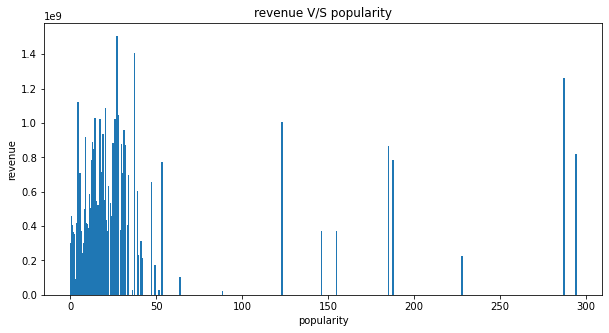

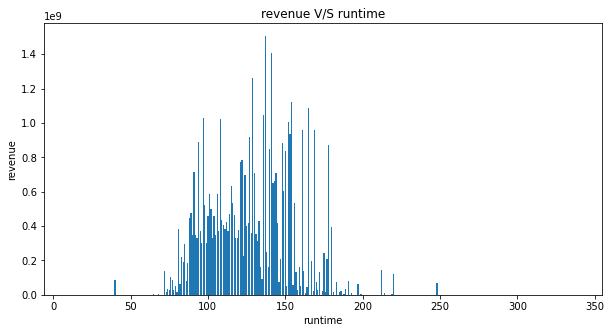

In [56]:
for i in ['popularity','runtime']:
    plt.figure(figsize=(10, 5))
    draw_barchart(i)
#Movies with 5-10 popularity range and 130-140 runtime duration generated higher revenue

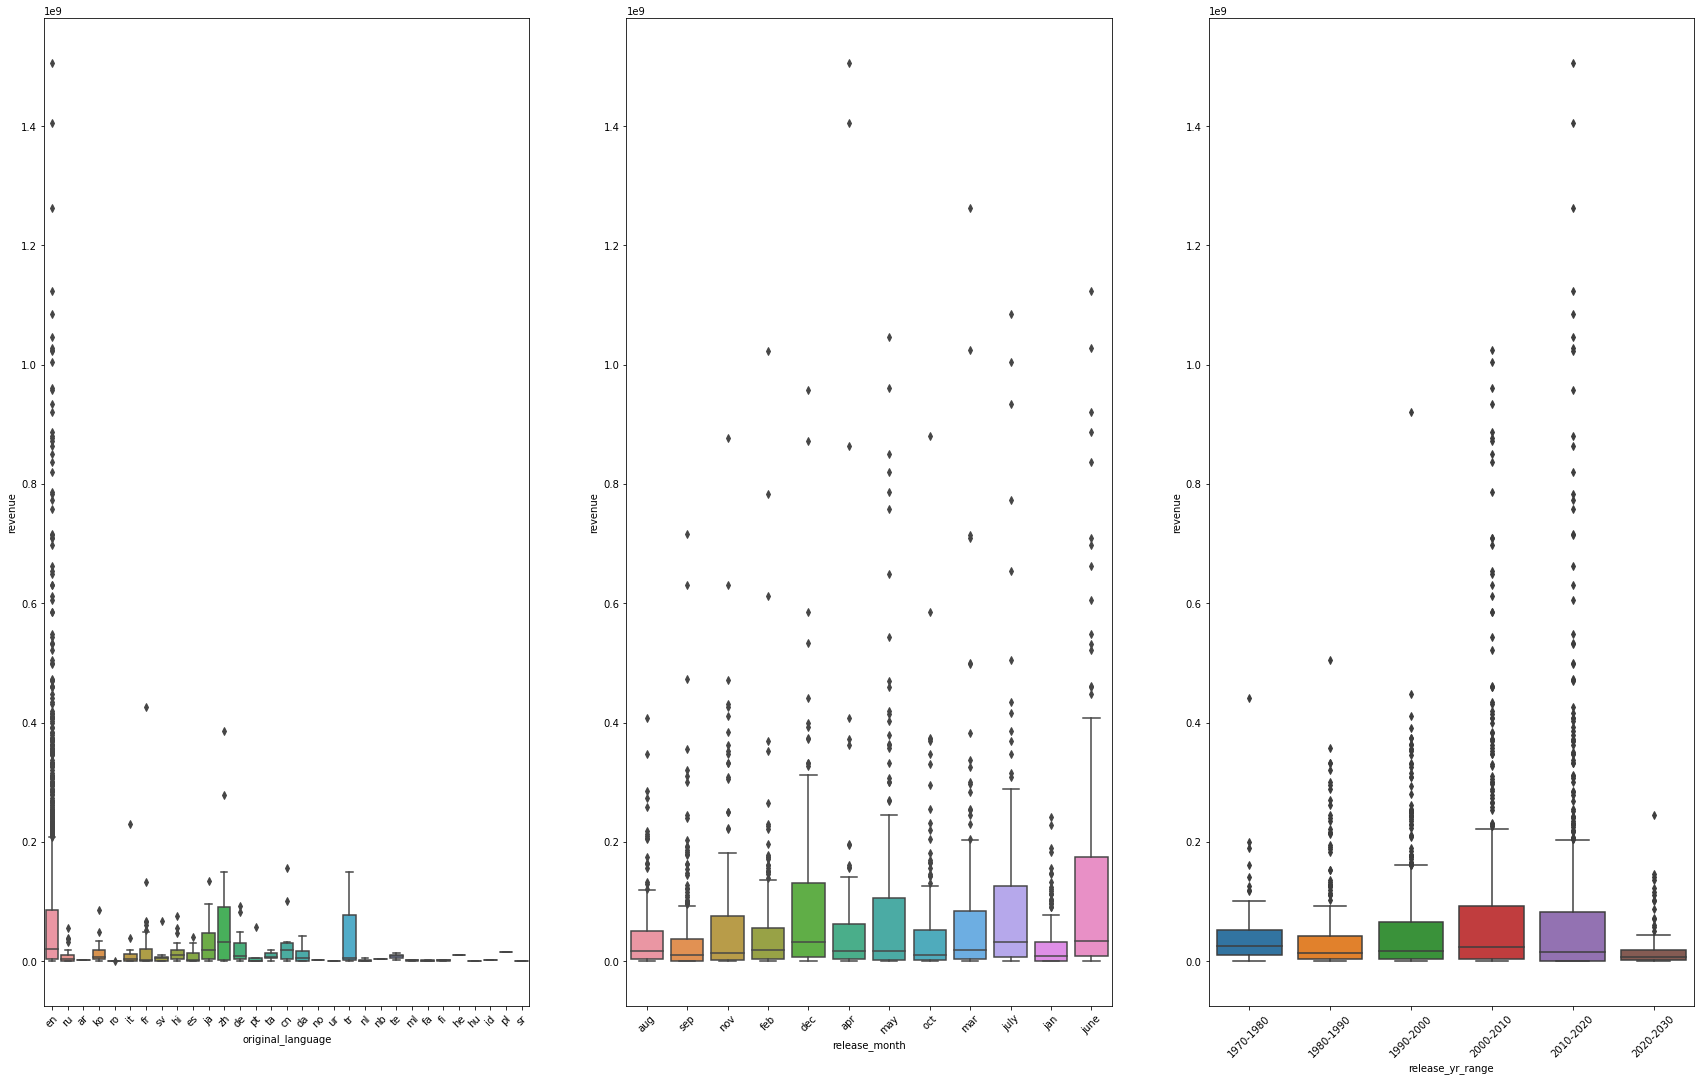

In [57]:
#visualizing categorical variables using box plot
plt.figure(figsize=(40, 40))
categorical_cols = ['original_language','release_month','release_yr_range']
for i,j in enumerate(categorical_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(x = j, y = 'revenue', data = movie_df)
    plt.xticks(rotation='45')
plt.show()

<b>Observation:</b>Maximum revenue is obsevred for the following:<br>
 - For movies having original language english<br>
 - Released in June<br>
 - Not much variation in release_year_range

In [58]:
#Reducing categories in original language
#Checking for values that are present in < 1% records
cols_to_combine = []
temp = movie_df['original_language'].value_counts().reset_index()
temp = temp[temp["original_language"]*100/temp["original_language"].sum() < 1]
for i in temp['index']:
    cols_to_combine.append(i)
cols_to_combine

['it',
 'zh',
 'ko',
 'ta',
 'cn',
 'de',
 'sv',
 'pt',
 'nl',
 'ro',
 'da',
 'tr',
 'fa',
 'hu',
 'te',
 'ml',
 'fi',
 'he',
 'pl',
 'id',
 'nb',
 'ur',
 'no',
 'ar',
 'sr']

In [59]:
#combining into other category
movie_df.original_language = movie_df.original_language.replace(cols_to_combine,'Other')

In [60]:
#checking most popular genre
movie_df_genre_popu = movie_df[['Western','Documentary','Action','Crime','Drama','Romance','Music','Comedy','Adventure','Thriller','Mystery',
                                'Science Fiction','Fantasy','Animation','Family','War','Horror','History','Foreign','popularity']]
max = 0
gen = ''
for i in list_genres:
  if i != 'TV Movie':
    if movie_df_genre_popu[movie_df_genre_popu[i]==1]['popularity'].median() > max:
      max = movie_df_genre_popu[movie_df_genre_popu[i]==1]['popularity'].median()
      gen = i
gen
#Adventure is most popular genre

'Adventure'

In [61]:
#checking genre that generated highest revenue
movie_df_genre_revenue = movie_df[['Western','Documentary','Action','Crime','Drama','Romance','Music','Comedy','Adventure','Thriller','Mystery',
                                   'Science Fiction','Fantasy','Animation','Family','War','Horror','History','Foreign','revenue']]
max = 0
gen = ''
for i in list_genres:
    if i != 'TV Movie':
        if movie_df_genre_revenue[movie_df_genre_revenue[i]==1]['revenue'].sum() > max:
            max = movie_df_genre_revenue[movie_df_genre_revenue[i]==1]['revenue'].sum()
            gen = i
gen
#Action genre has generated the most revenue

'Action'

<AxesSubplot:xlabel='release_month'>

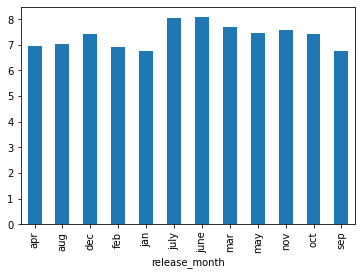

In [62]:
#checking relation between month and popularity
movie_df_mnth_popu = movie_df[['release_month','popularity']]
movie_df_mnth_popu.groupby('release_month')['popularity'].median().plot.bar()

#Not much variation, june july haveslightly more popular movies released

<AxesSubplot:xlabel='release_yr_range'>

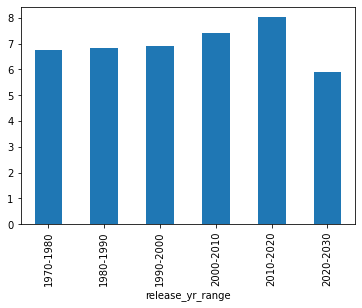

In [63]:
#checking relation between release_yr_range and popularity
movie_df_yr_popu = movie_df[['release_yr_range','popularity']]
movie_df_yr_popu.groupby('release_yr_range')['popularity'].median().plot.bar()

#2010-2020 has highest popular movie releases 

<AxesSubplot:xlabel='original_language'>

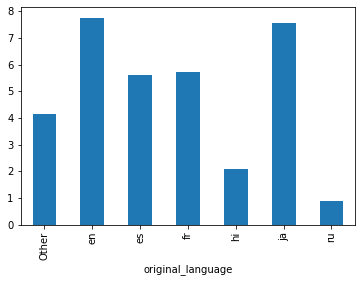

In [64]:
#checking relation between original_language and popularity
movie_df_ol_popu = movie_df[['original_language','popularity']]
movie_df_ol_popu.groupby('original_language')['popularity'].median().plot.bar()

#en and ja have most popular movies

In [65]:
#checking production country with highest revenue
movie_df_prod_count_revenue = movie_df[['Canada','Germany','France','United Kingdom','United States of America','revenue']]
max = 0
pc = ''
for i in valid_cat_pc:
    if movie_df_prod_count_revenue[movie_df_prod_count_revenue[i]==1]['revenue'].sum() > max:
        max = movie_df_prod_count_revenue[movie_df_prod_count_revenue[i]==1]['revenue'].sum()
        pc = i
pc
#Movies produced by production companies in United States of America has generated the most revenue

'United States of America'

In [66]:
#checking country whose production house produced most popular movies
movie_df_prod_count_popu = movie_df[['Canada','Germany','France','United Kingdom','United States of America','popularity']]
max = 0
pc = ''
for i in valid_cat_pc:
    if movie_df_prod_count_popu[movie_df_prod_count_popu[i]==1]['popularity'].median() > max:
        max = movie_df_prod_count_popu[movie_df_prod_count_popu[i]==1]['popularity'].median()
        pc = i
pc
#Movies produced by production companies in United Kingdom are most popular

'United Kingdom'

In [67]:
#checking spoken language with highest revenue
movie_df_sl_revenue = movie_df[['Italiano','Pусский','Deutsch','Español','Français','English','revenue']]
max = 0
pc = ''
for i in valid_cat_sl:
    if movie_df_sl_revenue[movie_df_sl_revenue[i]==1]['revenue'].sum() > max:
        max = movie_df_sl_revenue[movie_df_sl_revenue[i]==1]['revenue'].sum()
        pc = i
pc
#Movies having English spoken language has generated the most revenue

'English'

In [68]:
#checking spoken language that is most popular
movie_df_sl_popu = movie_df[['Italiano','Pусский','Deutsch','Español','Français','English','popularity']]
max = 0
pc = ''
for i in valid_cat_sl:
    if movie_df_sl_popu[movie_df_sl_popu[i]==1]['popularity'].median() > max:
        max = movie_df_sl_popu[movie_df_sl_popu[i]==1]['popularity'].median()
        pc = i
pc
#Movies having italian spoken language are most popular

'Italiano'

In [69]:
movie_df.head()

budget original_language  popularity  runtime   revenue  Western  \
0   3000000                en    6.090180    133.0   9012000        1   
1   8000000                en    0.075885     98.0    269823        0   
2   5000000                ru    0.191539    113.0    340312        0   
3   8000000                en    1.404434    109.0    135893        0   
4  28000000                en   13.162168    123.0  14051384        0   

   Documentary  Action  Crime  Drama  Romance  Music  Comedy  Adventure  \
0            0       0      0      0        0      0       0          0   
1            1       0      0      0        0      0       0          0   
2            0       1      1      0        0      0       0          0   
3            0       0      0      1        1      0       0          0   
4            0       1      1      0        0      1       1          0   

   Thriller  Mystery  Science Fiction  Fantasy  Animation  Family  War  \
0         0        0                0        0          0       0    0   
1         0        0                0        0          0       0    0   
2         0        0                0        0          0       0    0   
3         0        0                0        0          0       0    0   
4         0        0                0        0          0       0    0   

   Horror  History  Foreign  Canada  Germany  France  United Kingdom  \
0       0        0        0       0        0       0               0   
1       0        0        0       0        0       0               1   
2       0        0        0       0        0       0               0   
3       0        0        0       0        0       0               1   
4       0        0        0       0        0       0               0   

   United States of America  Italiano  Pусский  Deutsch  Español  Français  \
0                         1         1        0        1        1         0   
1                         1         0        0        0        0         0   
2                         0         0        1        0        0         0   
3                         0         0        0        0        0         0   
4                         1         0        1        0        0         0   

   English release_month release_yr_range  
0        1           aug        2020-2030  
1        1           sep        1980-1990  
2        0           aug        2000-2010  
3        1           nov        1990-2000  
4        1           feb        1990-2000

Creating dummies

In [70]:
# Dropping the first column from the dummies created using 'drop_first = True' to avoid multicollinearity in the model
release_month = pd.get_dummies(movie_df['release_month'], drop_first = True)
release_yr_range = pd.get_dummies(movie_df['release_yr_range'], drop_first = True)
original_language = pd.get_dummies(movie_df['original_language'], drop_first = True)

In [71]:
#Merging into main df
final_movie_df = pd.concat([movie_df,release_month,release_yr_range,original_language],axis=1)

# Dropping the original column
final_movie_df.drop('release_month',axis=1, inplace=True) 
final_movie_df.drop('release_yr_range',axis=1, inplace=True) 
final_movie_df.drop('original_language',axis=1, inplace=True)

final_movie_df.head()

budget  popularity  runtime   revenue  Western  Documentary  Action  \
0   3000000    6.090180    133.0   9012000        1            0       0   
1   8000000    0.075885     98.0    269823        0            1       0   
2   5000000    0.191539    113.0    340312        0            0       1   
3   8000000    1.404434    109.0    135893        0            0       0   
4  28000000   13.162168    123.0  14051384        0            0       1   

   Crime  Drama  Romance  Music  Comedy  Adventure  Thriller  Mystery  \
0      0      0        0      0       0          0         0        0   
1      0      0        0      0       0          0         0        0   
2      1      0        0      0       0          0         0        0   
3      0      1        1      0       0          0         0        0   
4      1      0        0      1       1          0         0        0   

   Science Fiction  Fantasy  Animation  Family  War  Horror  History  Foreign  \
0                0        0          0       0    0       0        0        0   
1                0        0          0       0    0       0        0        0   
2                0        0          0       0    0       0        0        0   
3                0        0          0       0    0       0        0        0   
4                0        0          0       0    0       0        0        0   

   Canada  Germany  France  United Kingdom  United States of America  \
0       0        0       0               0                         1   
1       0        0       0               1                         1   
2       0        0       0               0                         0   
3       0        0       0               1                         0   
4       0        0       0               0                         1   

   Italiano  Pусский  Deutsch  Español  Français  English  aug  dec  feb  jan  \
0         1        0        1        1         0        1    1    0    0    0   
1         0        0        0        0         0        1    0    0    0    0   
2         0        1        0        0         0        0    1    0    0    0   
3         0        0        0        0         0        1    0    0    0    0   
4         0        1        0        0         0        1    0    0    1    0   

   july  june  mar  may  nov  oct  sep  1980-1990  1990-2000  2000-2010  \
0     0     0    0    0    0    0    0          0          0          0   
1     0     0    0    0    0    0    1          1          0          0   
2     0     0    0    0    0    0    0          0          0          1   
3     0     0    0    0    1    0    0          0          1          0   
4     0     0    0    0    0    0    0          0          1          0   

   2010-2020  2020-2030  en  es  fr  hi  ja  ru  
0          0          1   1   0   0   0   0   0  
1          0          0   1   0   0   0   0   0  
2          0          0   0   0   0   0   0   1  
3          0          0   1   0   0   0   0   0  
4          0          0   1   0   0   0   0   0

In [72]:
final_movie_df.shape

(2382, 56)

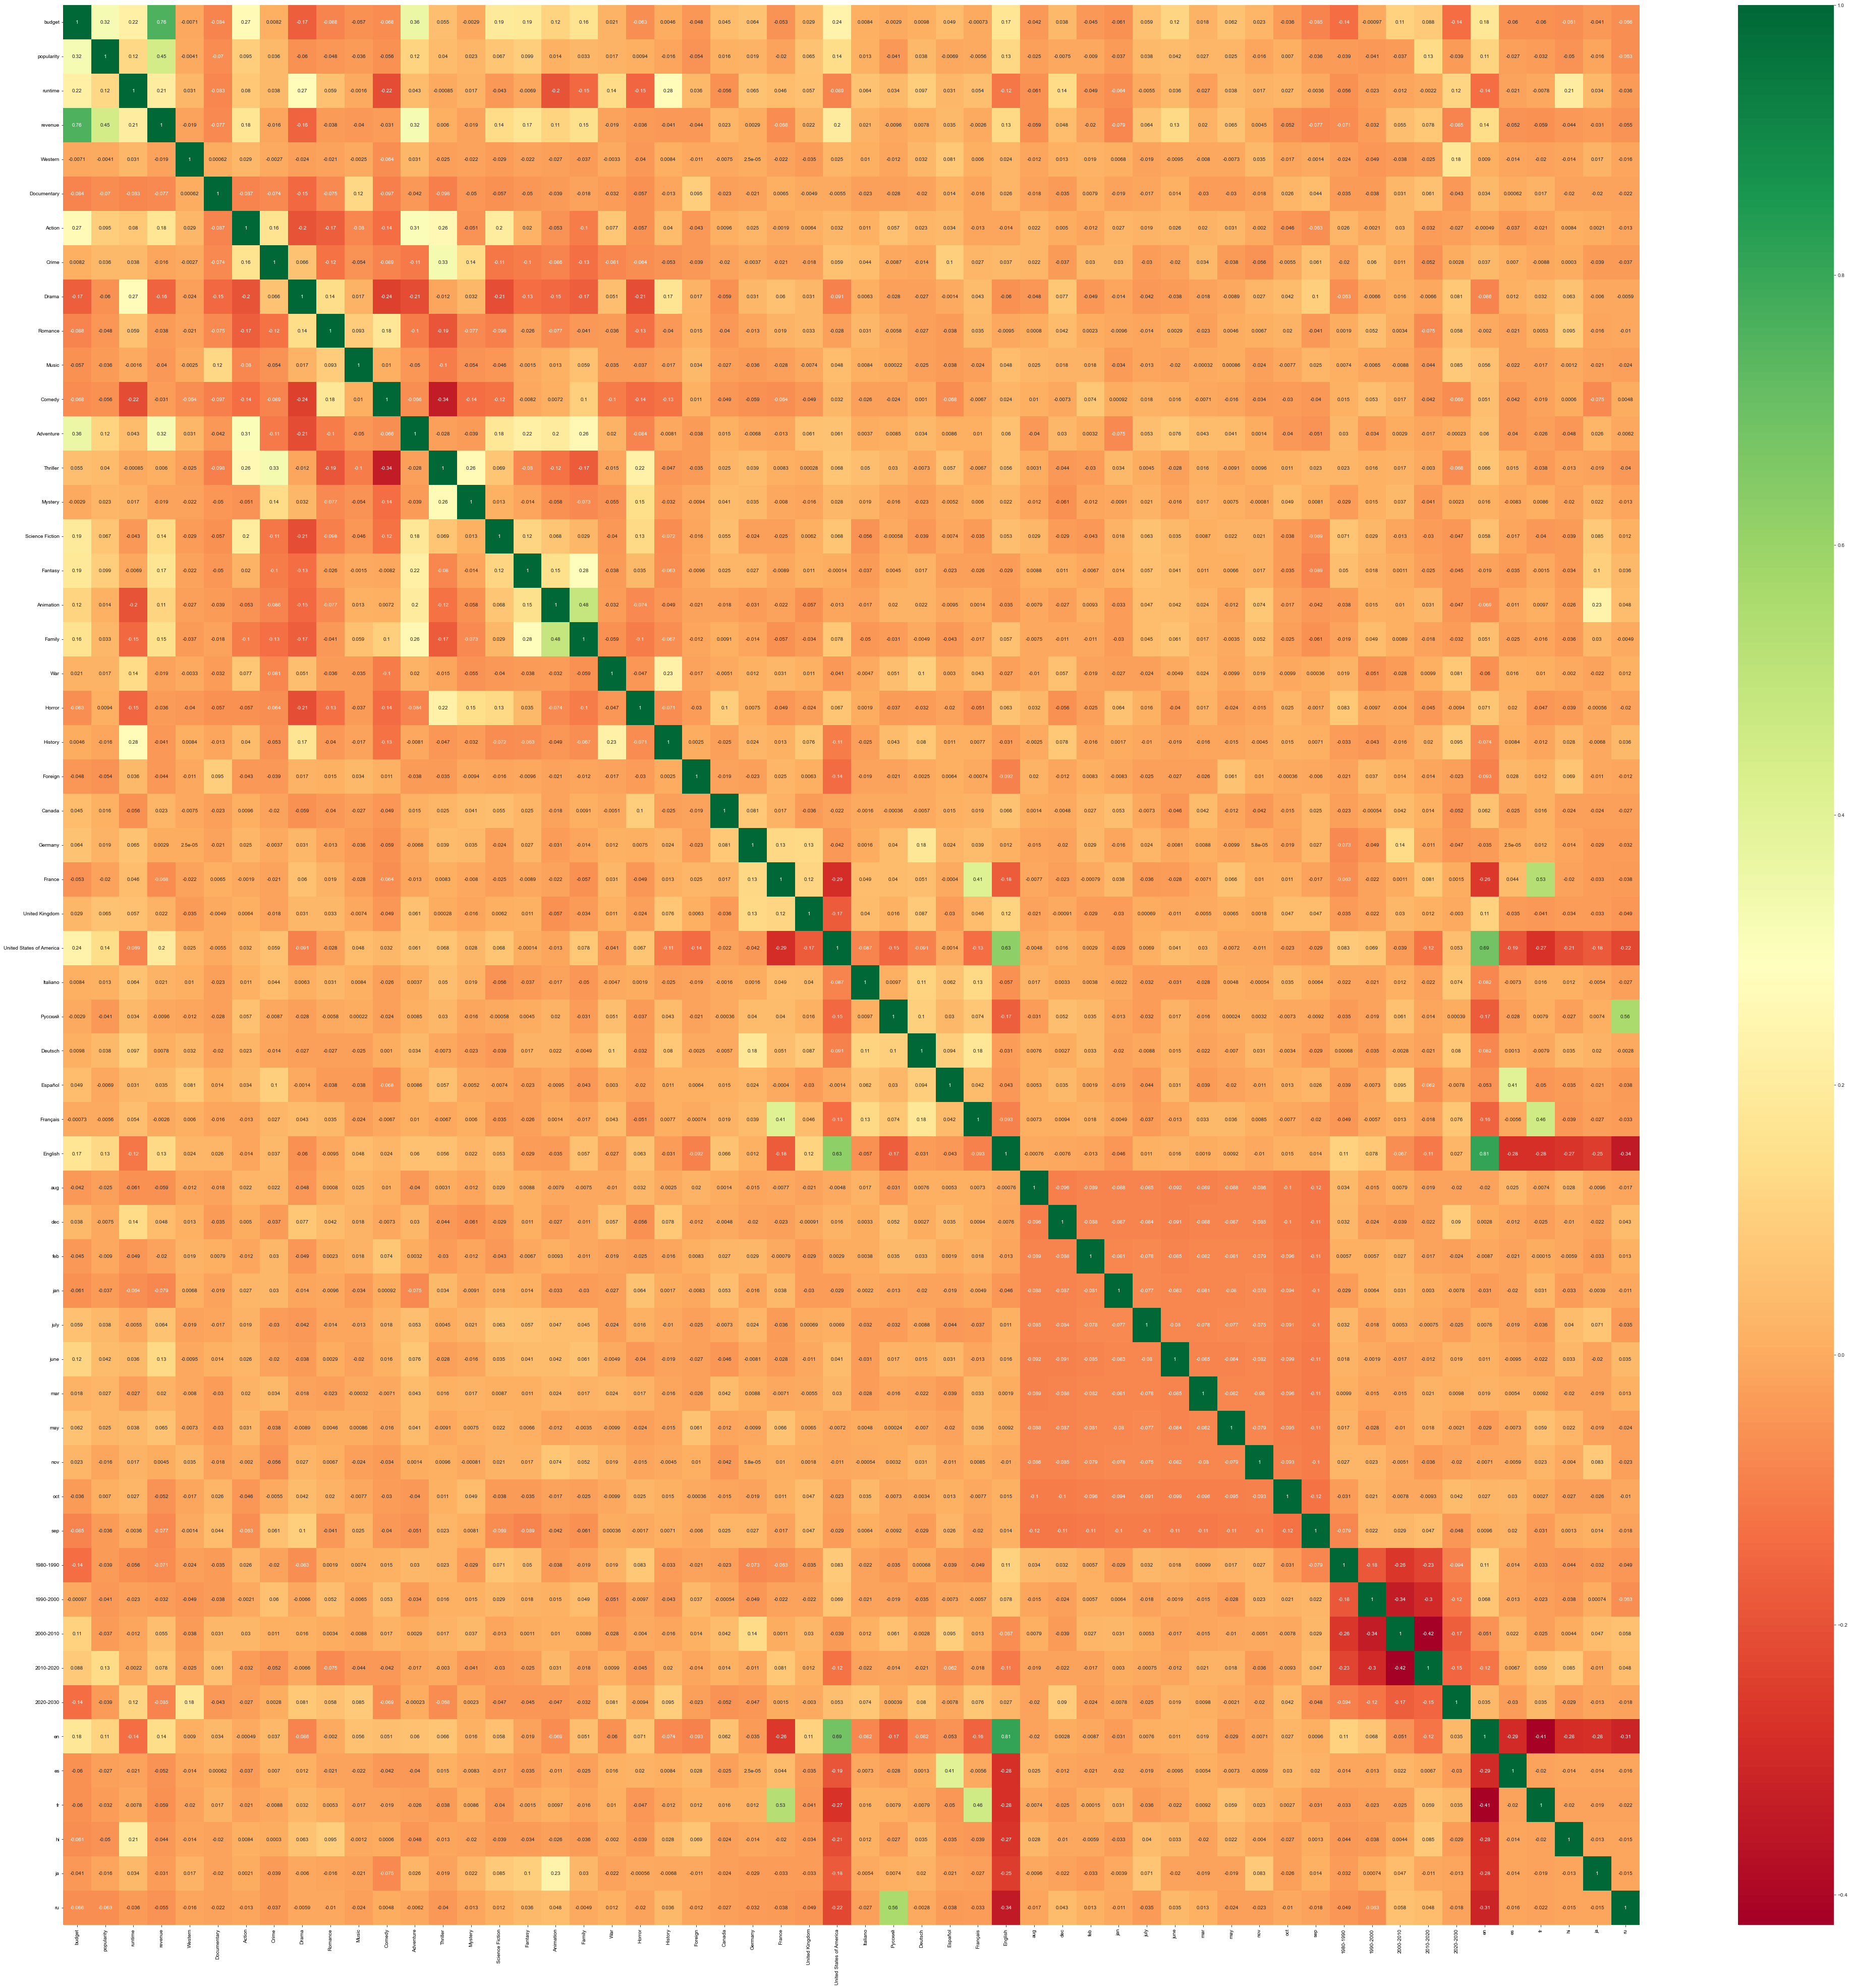

In [73]:
#checking correlation between numeric and boolean variables with revenue
res = final_movie_df.corr()
f, ax = plt.subplots(figsize=(70,70))
with sns.axes_style("white"):
    ax = sns.heatmap(res, annot=True, cmap='RdYlGn')
    plt.show()


In [74]:
#dropping columns that can cause multicollinearity
cols_to_drop=['United States of America','es','fr','hi','ja','ru','Thriller','2000-2010','1980-1990','1990-2000','Animation','France']
final_movie_df.drop(cols_to_drop,axis=1,inplace=True)

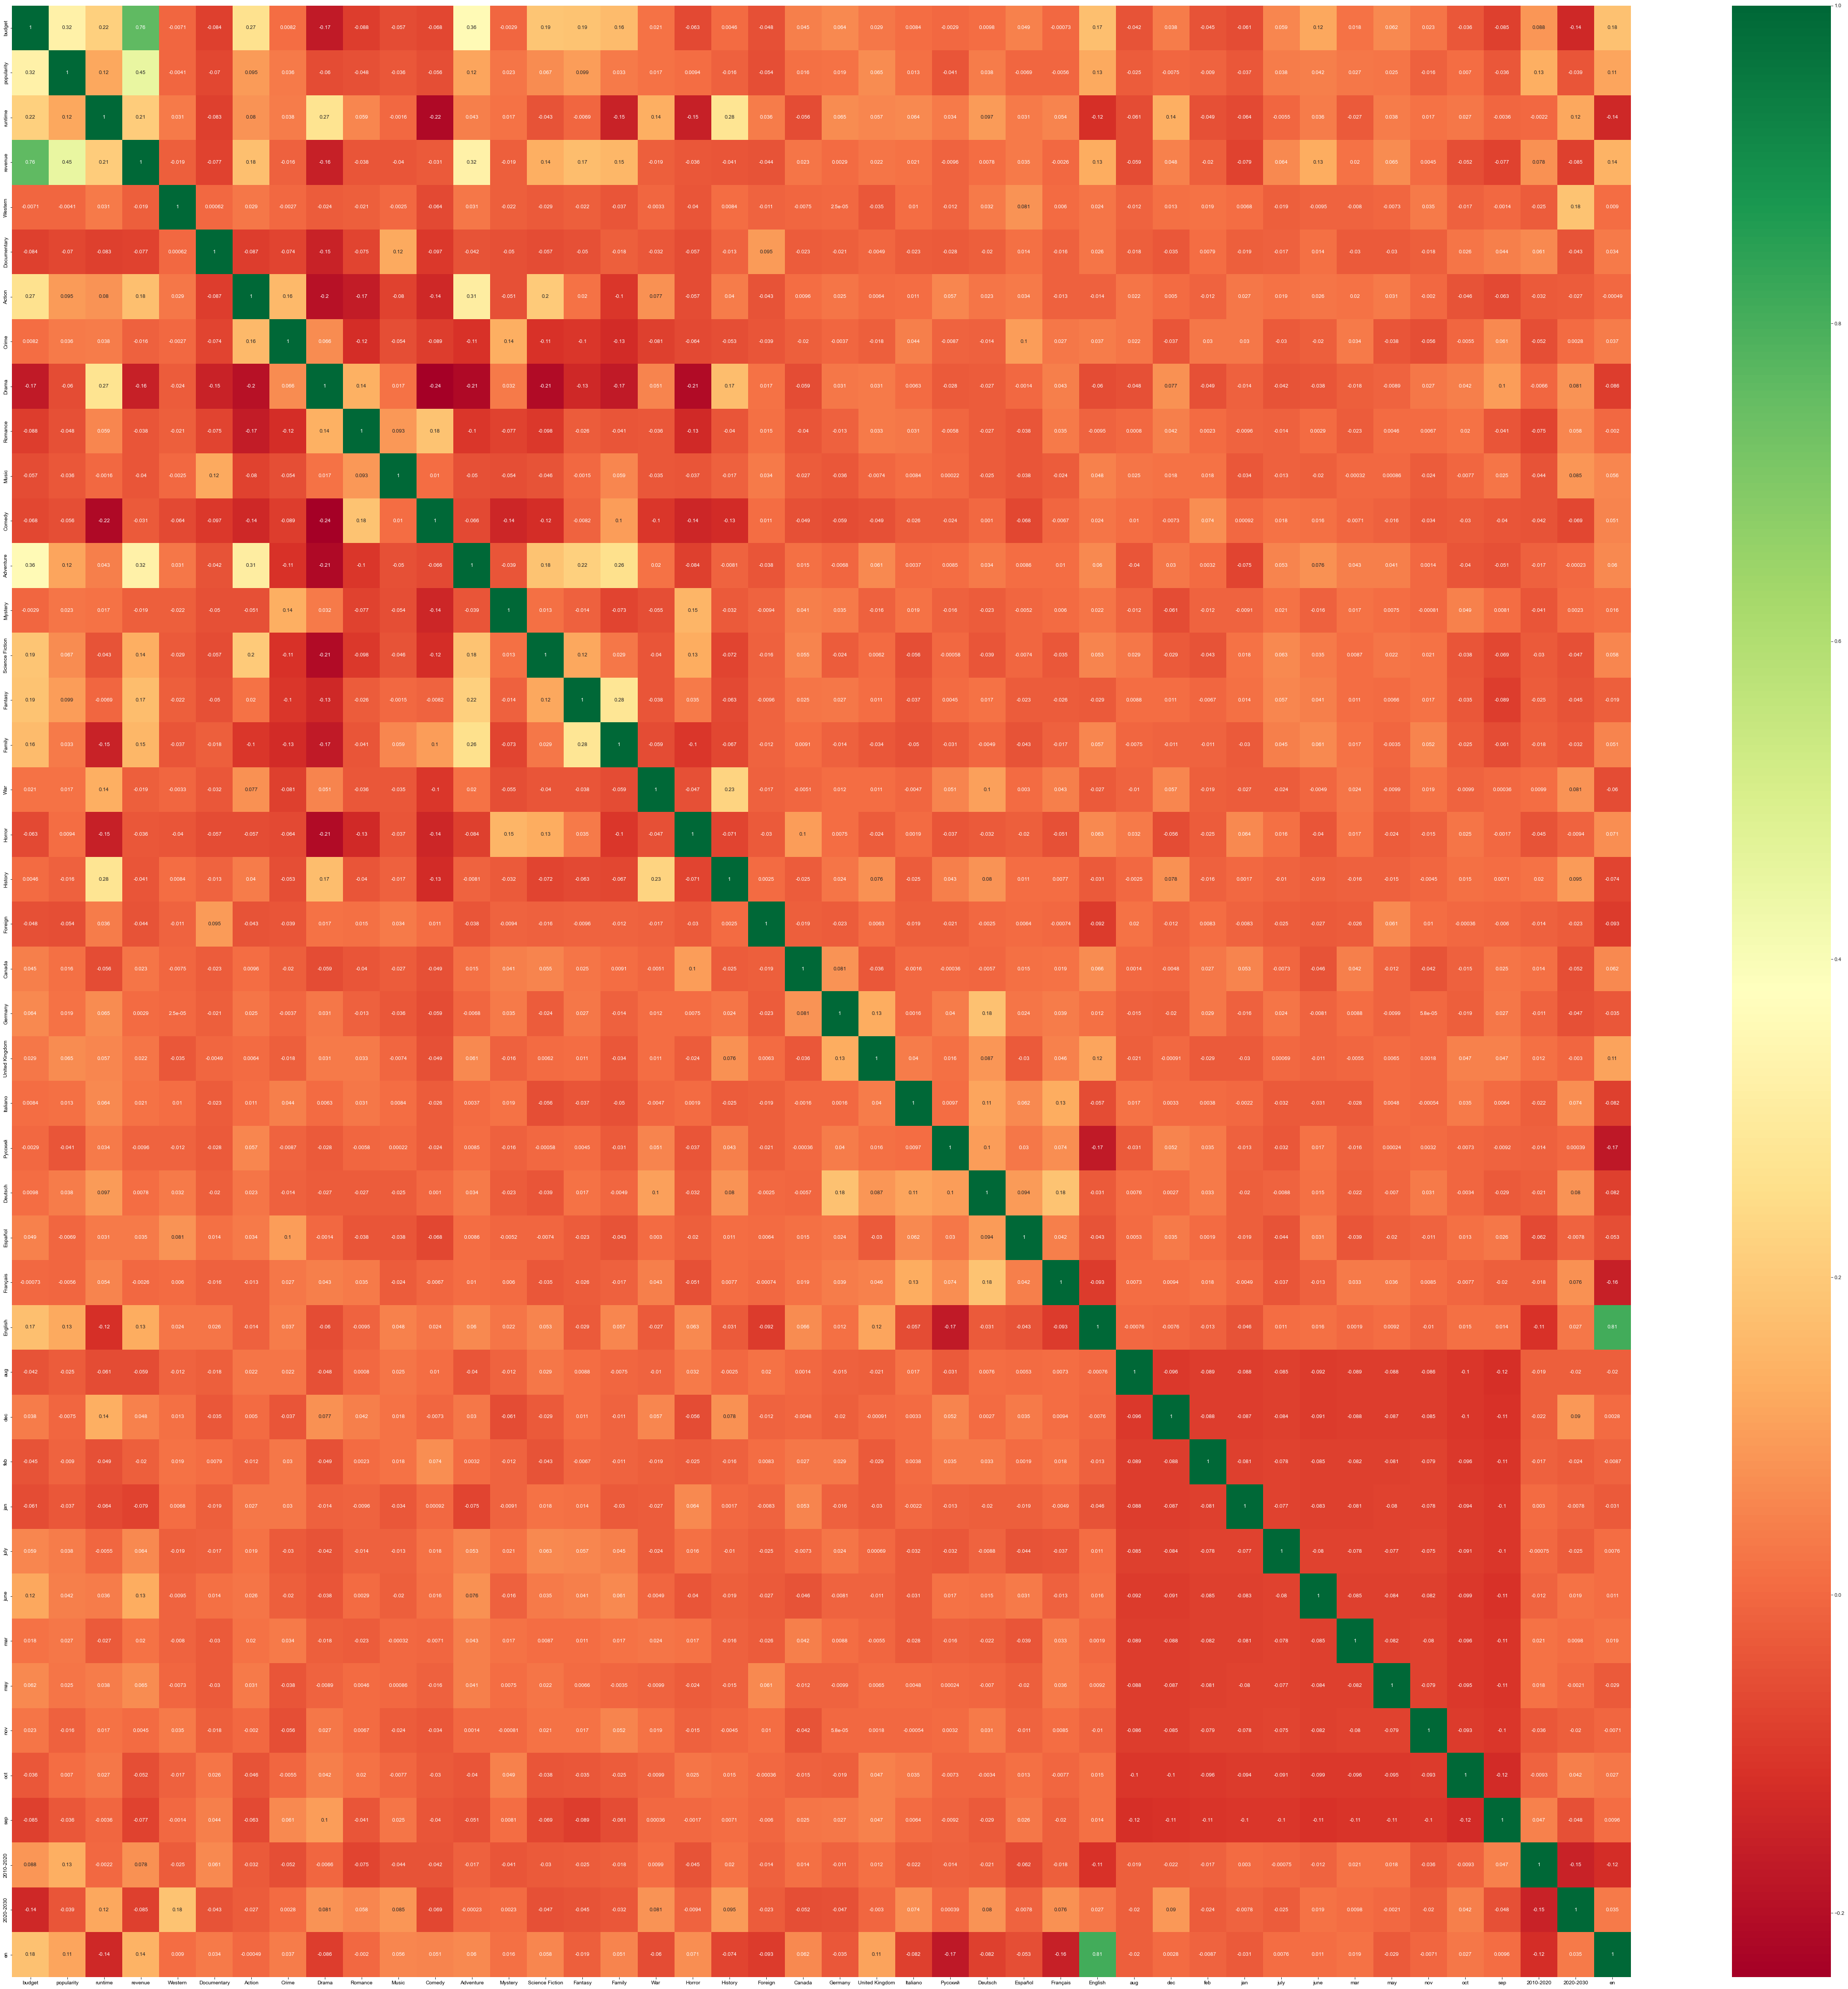

In [75]:
#checking correlation between numeric and boolean variables with revenue
res = final_movie_df.corr()
f, ax = plt.subplots(figsize=(70,70))
with sns.axes_style("white"):
    ax = sns.heatmap(res, annot=True, cmap='RdYlGn')
    plt.show()


In [76]:
final_movie_df.shape

(2382, 44)

Splitting data into train and test

In [77]:
# We specify random state so that the train and test data set always have the same rows, respectively

np.random.seed(0)

df_train, df_test = train_test_split(final_movie_df, train_size = 0.7, test_size = 0.3, random_state = 100)


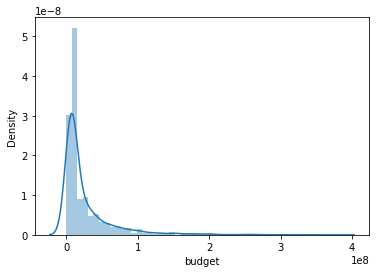

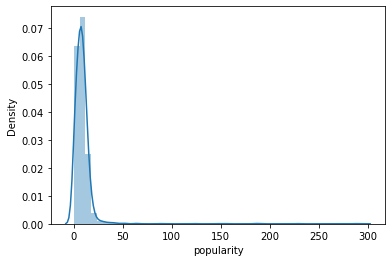

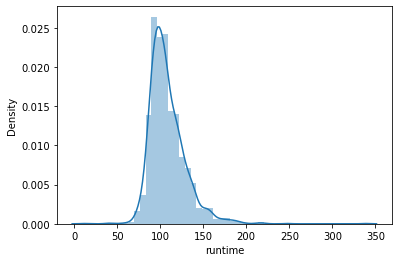

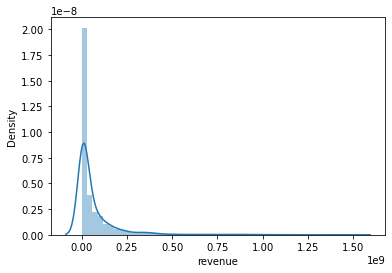

In [78]:
for i in cols_to_update:
    sns.distplot(final_movie_df[i])
    plt.show()

In [79]:
#As all columns have normal distribution we will use standardized scaling
scaler = StandardScaler()
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[cols_to_update] = scaler.fit_transform(df_train[cols_to_update])

df_train.head()

budget  popularity   runtime   revenue  Western  Documentary  Action  \
1138 -0.484190   -0.351484 -0.877654 -0.419883        0            0       0   
2371 -0.157633    0.523234  1.088118 -0.087060        0            0       0   
1812  0.087284    0.007980 -0.316005  0.201590        0            0       1   
138  -0.484190   -0.471859 -0.456417 -0.491974        0            0       0   
563  -0.484190   -0.376099 -0.924458 -0.491650        0            0       0   

      Crime  Drama  Romance  Music  Comedy  Adventure  Mystery  \
1138      0      0        0      0       1          0        0   
2371      0      1        0      0       0          0        0   
1812      0      0        0      0       0          0        0   
138       0      1        1      0       0          0        0   
563       0      0        0      0       0          0        1   

      Science Fiction  Fantasy  Family  War  Horror  History  Foreign  Canada  \
1138                0        0       1    0       0        0        0       1   
2371                0        1       0    0       0        0        0       0   
1812                0        0       0    0       0        0        0       0   
138                 0        0       0    0       0        0        0       0   
563                 0        0       0    0       1        0        0       0   

      Germany  United Kingdom  Italiano  Pусский  Deutsch  Español  Français  \
1138        0               0         0        0        0        0         0   
2371        0               0         0        0        0        0         0   
1812        0               0         0        0        0        1         0   
138         0               0         0        0        0        0         1   
563         0               0         0        0        0        0         0   

      English  aug  dec  feb  jan  july  june  mar  may  nov  oct  sep  \
1138        1    1    0    0    0     0     0    0    0    0    0    0   
2371        1    0    0    0    0     0     0    1    0    0    0    0   
1812        1    0    0    0    0     0     0    0    0    0    0    1   
138         0    0    0    0    0     0     0    0    1    0    0    0   
563         1    0    0    0    0     0     0    1    0    0    0    0   

      2010-2020  2020-2030  en  
1138          0          0   1  
2371          1          0   1  
1812          0          0   1  
138           0          0   0  
563           0          0   1

In [80]:
#assigning revenue to y_train and the rest of the columns to X_train
y_train = df_train.pop('revenue')
X_train = df_train

In [81]:
y_train.head()

1138   -0.419883
2371   -0.087060
1812    0.201590
138    -0.491974
563    -0.491650
Name: revenue, dtype: float64

In [82]:
X_train.head()

budget  popularity   runtime  Western  Documentary  Action  Crime  \
1138 -0.484190   -0.351484 -0.877654        0            0       0      0   
2371 -0.157633    0.523234  1.088118        0            0       0      0   
1812  0.087284    0.007980 -0.316005        0            0       1      0   
138  -0.484190   -0.471859 -0.456417        0            0       0      0   
563  -0.484190   -0.376099 -0.924458        0            0       0      0   

      Drama  Romance  Music  Comedy  Adventure  Mystery  Science Fiction  \
1138      0        0      0       1          0        0                0   
2371      1        0      0       0          0        0                0   
1812      0        0      0       0          0        0                0   
138       1        1      0       0          0        0                0   
563       0        0      0       0          0        1                0   

      Fantasy  Family  War  Horror  History  Foreign  Canada  Germany  \
1138        0       1    0       0        0        0       1        0   
2371        1       0    0       0        0        0       0        0   
1812        0       0    0       0        0        0       0        0   
138         0       0    0       0        0        0       0        0   
563         0       0    0       1        0        0       0        0   

      United Kingdom  Italiano  Pусский  Deutsch  Español  Français  English  \
1138               0         0        0        0        0         0        1   
2371               0         0        0        0        0         0        1   
1812               0         0        0        0        1         0        1   
138                0         0        0        0        0         1        0   
563                0         0        0        0        0         0        1   

      aug  dec  feb  jan  july  june  mar  may  nov  oct  sep  2010-2020  \
1138    1    0    0    0     0     0    0    0    0    0    0          0   
2371    0    0    0    0     0     0    1    0    0    0    0          1   
1812    0    0    0    0     0     0    0    0    0    0    1          0   
138     0    0    0    0     0     0    0    1    0    0    0          0   
563     0    0    0    0     0     0    1    0    0    0    0          0   

      2020-2030  en  
1138          0   1  
2371          0   1  
1812          0   1  
138           0   0  
563           0   1

Using RFE to select top 15

In [83]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [84]:
#columns that offer support to prediction
col = X_train.columns[rfe.support_]
col

Index(['budget', 'popularity', 'Action', 'Romance', 'Adventure',
       'Science Fiction', 'Family', 'War', 'Horror', 'History', 'Germany',
       'dec', 'feb', 'july', 'june'],
      dtype='object')

In [85]:
#columns that don't offer support to prediction
X_train.columns[~rfe.support_]

Index(['runtime', 'Western', 'Documentary', 'Crime', 'Drama', 'Music',
       'Comedy', 'Mystery', 'Fantasy', 'Foreign', 'Canada', 'United Kingdom',
       'Italiano', 'Pусский', 'Deutsch', 'Español', 'Français', 'English',
       'aug', 'jan', 'mar', 'may', 'nov', 'oct', 'sep', '2010-2020',
       '2020-2030', 'en'],
      dtype='object')

In [86]:
#generic function for calulcatin VIF for a df
def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Model 1

In [87]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of linear model 1
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:07   Log-Likelihood:                -1527.0
No. Observations:                1667   AIC:                             3086.
Df Residuals:                    1651   BIC:                             3173.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0487      0.025     

In [88]:
#calculation VIF for model 1
cal_VIF(X_train_rfe)

#Observation: all features have ViF <5

Features   VIF
4         Adventure  1.55
2            Action  1.43
0            budget  1.34
5   Science Fiction  1.21
6            Family  1.21
1        popularity  1.13
3           Romance  1.11
9           History  1.11
11              dec  1.11
7               War  1.10
14             june  1.09
13             july  1.08
8            Horror  1.07
12              feb  1.06
10          Germany  1.05

In [89]:
#Removing 'Family' as it is insignificant
X_train_new = X_train_rfe.drop(['Family'], axis = 1)

In [90]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_new)

lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

#Summary of linear model 2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:07   Log-Likelihood:                -1527.8
No. Observations:                1667   AIC:                             3086.
Df Residuals:                    1652   BIC:                             3167.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0403      0.024     

In [91]:
#calculation VIF for model 2
cal_VIF(X_train_new)

Features   VIF
4         Adventure  1.41
2            Action  1.40
0            budget  1.33
5   Science Fiction  1.20
1        popularity  1.13
8           History  1.11
10              dec  1.11
3           Romance  1.10
6               War  1.10
13             june  1.08
7            Horror  1.07
12             july  1.07
11              feb  1.06
9           Germany  1.05

In [92]:
#Removing Science Fiction as it is insignificant
X_train_new = X_train_new.drop(['Science Fiction'], axis = 1)

In [93]:
# Adding a constant variable 
X_train_lm_3 = sm.add_constant(X_train_new)

lm3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model

#Summary of linear model 3
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:07   Log-Likelihood:                -1528.6
No. Observations:                1667   AIC:                             3085.
Df Residuals:                    1653   BIC:                             3161.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0449      0.024     -1.880      0.0

In [94]:
#Removing Horror as it is insiginifacnt
X_train_new = X_train_new.drop(['Horror'], axis = 1)

In [95]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new)

lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

#Summary of linear model 4
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     237.9
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:07   Log-Likelihood:                -1529.5
No. Observations:                1667   AIC:                             3085.
Df Residuals:                    1654   BIC:                             3155.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0349      0.023     -1.541      0.1

In [96]:
#Removing july as it is insignificant
X_train_new = X_train_new.drop(['july'], axis = 1)

In [97]:
# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_new)

lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

#Summary of linear model 5
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:07   Log-Likelihood:                -1530.8
No. Observations:                1667   AIC:                             3086.
Df Residuals:                    1655   BIC:                             3151.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0270      0.022     -1.220      0.2

In [98]:
#Removing feb as it is insiginifacnt
X_train_new = X_train_new.drop(['feb'], axis = 1)

In [99]:
# Adding a constant variable 
X_train_lm6 = sm.add_constant(X_train_new)

lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model

#Summary of linear model 6
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     284.5
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:08   Log-Likelihood:                -1532.0
No. Observations:                1667   AIC:                             3086.
Df Residuals:                    1656   BIC:                             3146.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0192      0.022     -0.889      0.3

In [100]:
#Removing War as it is insiginifacnt
X_train_new = X_train_new.drop(['War'], axis = 1)

In [101]:
# Adding a constant variable 
X_train_lm7 = sm.add_constant(X_train_new)

lm7 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model

#Summary of linear model 7
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     315.3
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:08   Log-Likelihood:                -1533.6
No. Observations:                1667   AIC:                             3087.
Df Residuals:                    1657   BIC:                             3141.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0222      0.021     -1.031      0.3

In [102]:
#Removing Romance as it is insiginifacnt
X_train_new = X_train_new.drop(['Romance'], axis = 1)

In [103]:
# Adding a constant variable 
X_train_lm8 = sm.add_constant(X_train_new)

lm8 = sm.OLS(y_train,X_train_lm8).fit()   # Running the linear model

#Summary of linear model 8
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:08   Log-Likelihood:                -1535.7
No. Observations:                1667   AIC:                             3089.
Df Residuals:                    1658   BIC:                             3138.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.020     -0.247      0.8

In [104]:
#Removing Germany as it is insiginifacnt
X_train_new = X_train_new.drop(['Germany'], axis = 1)

In [105]:
# Adding a constant variable 
X_train_lm9 = sm.add_constant(X_train_new)

lm9 = sm.OLS(y_train,X_train_lm9).fit()   # Running the linear model

#Summary of linear model 8
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     402.5
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:08   Log-Likelihood:                -1538.1
No. Observations:                1667   AIC:                             3092.
Df Residuals:                    1659   BIC:                             3136.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0135      0.019     -0.699      0.4

In [106]:
#Removing dec as it is insiginifacnt
X_train_new = X_train_new.drop(['dec'], axis = 1)

In [107]:
# Adding a constant variable 
X_train_lm10 = sm.add_constant(X_train_new)

lm10 = sm.OLS(y_train,X_train_lm10).fit()   # Running the linear model

#Summary of linear model 9
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     467.4
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:08   Log-Likelihood:                -1540.8
No. Observations:                1667   AIC:                             3096.
Df Residuals:                    1660   BIC:                             3133.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.019     -0.071      0.9

In [108]:
#Removing History as it is insiginifacnt
X_train_new = X_train_new.drop(['History'], axis = 1)

In [109]:
# Adding a constant variable 
X_train_lm11 = sm.add_constant(X_train_new)

lm11 = sm.OLS(y_train,X_train_lm11).fit()   # Running the linear model

#Summary of linear model 11
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     558.2
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:08:08   Log-Likelihood:                -1543.6
No. Observations:                1667   AIC:                             3099.
Df Residuals:                    1661   BIC:                             3132.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0091      0.018     -0.496      0.6

In [110]:
#calculation VIF for model 11
cal_VIF(X_train_new)
#Observation: all independent features have VIF < 5

Features   VIF
3   Adventure  1.36
0      budget  1.29
2      Action  1.25
1  popularity  1.13
4        june  1.06

**Observation:** 
Model 11 seems to be the best model as r2 and adjusted r2 are 0.62.
P(t) is approximately 0 for all features hence all are significant. VIF for all features is less than 5 hence no multicollieanrity is present.
F-statistic is 558.2 which is greater than 1 and probability of f-statistic is 0 hence the overall model is significant.

### Residual Analysis

In [111]:
#predection using model 11
y_train_pred = lm11.predict(X_train_lm11)

Text(0.5, 0, 'Errors')

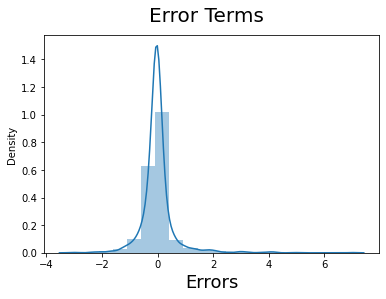

In [112]:
# Plotting the distirbution of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Observation:** As we can see from the distribution plot, the error terms are normally distributed with mean as 0.0.

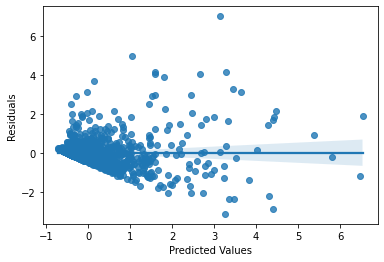

In [113]:
#checking for pattern in error terms
residual = y_train - y_train_pred
sns.regplot(y_train_pred,residual)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

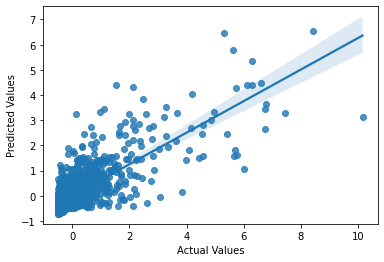

In [114]:
#checking if variance varies along with linearity of model
sns.regplot(y_train,y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Model Prediction

In [115]:
#Scaling the numeric columns in test dataframe
numeric_cols = ['budget','popularity','runtime','revenue']
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [116]:
#Dividing test dataframe into X_test and y_test
y_test = df_test.pop('revenue')
X_test = df_test

In [117]:
y_test.head()

222     0.074193
1724   -0.242754
232    -0.423491
1757   -0.482707
1232   -0.388134
Name: revenue, dtype: float64

In [118]:
X_test.head()

budget  popularity   runtime  Western  Documentary  Action  Crime  \
222   0.930888    0.005769  0.854097        0            0       0      0   
1724  0.114497    0.192914  0.011624        0            0       0      0   
232  -0.620255   -0.535650 -0.456417        0            0       0      0   
1757 -0.698247   -0.458828 -0.222397        0            0       0      0   
1232 -0.538616   -0.237037 -0.784046        0            0       0      0   

      Drama  Romance  Music  Comedy  Adventure  Mystery  Science Fiction  \
222       1        0      0       0          0        0                0   
1724      0        0      0       0          0        0                0   
232       0        0      0       1          0        0                0   
1757      1        0      0       0          0        0                0   
1232      1        0      0       0          1        0                0   

      Fantasy  Family  War  Horror  History  Foreign  Canada  Germany  \
222         0       0    0       0        0        0       0        0   
1724        0       0    0       0        0        0       0        0   
232         0       0    0       0        0        0       0        0   
1757        0       0    0       0        1        0       0        0   
1232        0       0    0       1        0        0       0        0   

      United Kingdom  Italiano  Pусский  Deutsch  Español  Français  English  \
222                0         1        0        0        0         1        1   
1724               0         0        0        0        1         0        1   
232                0         0        1        0        0         0        0   
1757               0         0        0        0        0         0        1   
1232               0         0        0        0        0         0        1   

      aug  dec  feb  jan  july  june  mar  may  nov  oct  sep  2010-2020  \
222     0    0    0    0     0     0    0    0    0    1    0          0   
1724    0    0    0    1     0     0    0    0    0    0    0          0   
232     0    0    0    0     0     0    0    0    0    0    1          0   
1757    0    0    0    0     1     0    0    0    0    0    0          1   
1232    0    0    0    0     1     0    0    0    0    0    0          0   

      2020-2030  en  
222           0   1  
1724          0   1  
232           0   0  
1757          0   1  
1232          0   1

In [119]:
# Creating X_test_new dataframe by dropping variables from X_test based on the final features in model selected
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm11.predict(X_test_new)

In [120]:
#calculating r2 for test data
r2 = r2_score(y_test, y_pred) 
round(r2,2)

0.62

In [121]:
#calculating adjusted r2 for test data
#adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1) where n is sample size and p is number of independent variables
adjustedr2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),2)
print(adjustedr2)

0.6


**Observation:** 
*   R2 for test data : 0.62
*   Adjusted R2 for test data: 0.6

Final Model Interpretation and Conclusion

In [122]:
lm11.params

const        -0.009130
budget        0.671518
popularity    0.215280
Action       -0.117620
Adventure     0.154513
june          0.218558
dtype: float64

<b>Observation:</b> The demand is positively influenced by budget, popularity, Adventure and june
The demand is negatively influenced by Action

**Final Linear Regression Equation:** 
revenue = - 0.009130 * const + 0.671518 * budget + 0.215280 * popularity - 0.117620 * Action + 0.154513 * Adventure + 0.218558 * june

**Conclusion**: 

*  Model 11 is considered to be the best model with adjusted r2 value of 0.62 for train data and 0.6 for test data.
*   The model is also satisfying the assumptions of linear regression.
*   The demand of bike is influenced by the following factors: budget, popularity, Action, Adventure, june

